In [96]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, ward_tree, AgglomerativeClustering
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from matplotlib import pyplot as plt, colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, make_scorer, rand_score
from sklearn.metrics.pairwise import manhattan_distances
from scipy.stats import uniform
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram
#%matplotlib notebook

***ЗАДАНИЕ 1***

Разбейте множество объектов из набора данных pluton в пакете «cluster» на 3 кластера методом центров тяжести (kmeans). Сравните качество разбиения в зависимости от максимального числа итераций алгоритма.

In [2]:
data = pd.read_csv('pluton.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Pu238,Pu239,Pu240,Pu241
0,0.126,75.804,21.204,2.180
1,0.133,75.515,21.408,2.240
2,0.127,75.175,21.668,2.305
3,0.156,78.872,18.428,1.906
4,0.503,73.317,20.223,4.128


In [3]:
for max_iter in range(1, 10):
    kmeans = KMeans(n_clusters=3, max_iter=max_iter).fit(data)
    print(max_iter, kmeans.score(data))

1 -231.17466762499996
2 -231.17466762499996
3 -231.17466762499996
4 -231.17466762499996
5 -231.17466762499996
6 -231.17466762499996
7 -231.17466762499996
8 -231.17466762499996
9 -231.17466762499996


??????

***ЗАДАНИЕ 2***

Сгенерируйте набор данных в двумерном пространстве, состоящий из 3 кластеров, каждый из которых сильно “вытянут” вдоль одной из осей. Исследуйте качество кластеризации методом clara в зависимости от 1) использования стандартизации; 2) типа метрики. Объясните полученные результаты.

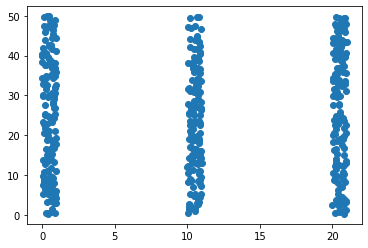

In [88]:
data = np.concatenate((uniform.rvs(loc=(0, 0), scale=(1, 50), size=(150, 2)), 
                       uniform.rvs(loc=(10, 0), scale=(1, 50), size=(150, 2)),
                       uniform.rvs(loc=(20, 0), scale=(1, 50), size=(150, 2))
                      ))
plt.scatter(data[:, 0], data[:, 1])
#np.random.normal()

In [89]:
def plot_med(title: str, make_stand: bool, metric = 'euclidean'):
    if make_stand:
        tdata = StandardScaler().fit_transform(data)
    else:
        tdata = data
    
    kmedoids = KMedoids(n_clusters=3, metric=metric, method='pam').fit(tdata)
    labels = kmedoids.labels_

    unique_labels = set(labels)
    colors = [
        plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
    ]
    for k, col in zip(unique_labels, colors):

        class_member_mask = labels == k

        xy = tdata[class_member_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )
    plt.title(title)
    plt.show()

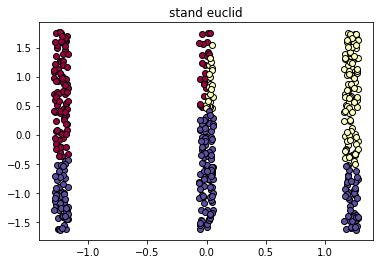

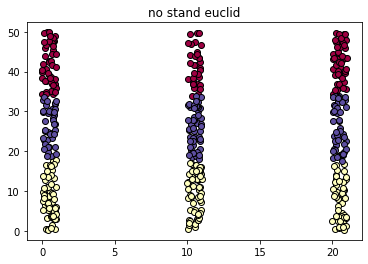

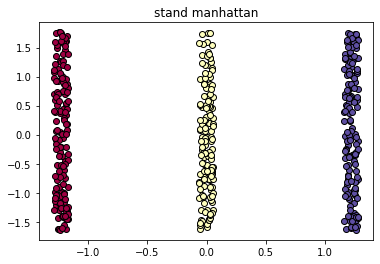

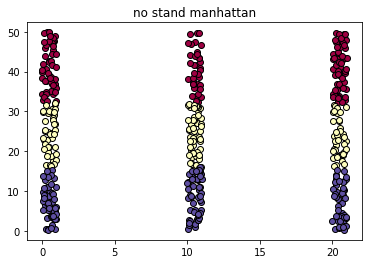

In [90]:
for title, stand, metric in (('stand euclid', True, 'euclidean'), ('no stand euclid', False, 'euclidean'),
                             ('stand manhattan', True, 'manhattan'), ('no stand manhattan', False, 'manhattan')
                            ):
    plot_med(title, stand, metric)

***ЗАДАНИЕ 3***

Постройте дендрограмму для набора данных votes.repub в пакете «cluster» (число голосов, поданных за республиканцев на выборах с 1856 по 1976 год). Строки представляют 50 штатов, а столбцы -  годы выборов (31). Проинтерпретируйте полученный результат.

In [122]:
data = pd.read_csv('votes.repub.csv')
data.head()

,Unnamed: 0,X1856,X1860,X1864,X1868,X1872,X1876,X1880,X1884,X1888,...,X1940,X1944,X1948,X1952,X1956,X1960,X1964,X1968,X1972,X1976
0,Alabama,NaN,NaN,NaN,51.44,53.19,40.02,36.98,38.44,32.28,...,14.34,18.20,19.04,35.02,39.39,41.75,69.5,14.0,72.4,43.48
1,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,50.94,34.1,45.3,58.1,62.91
2,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.01,40.90,43.82,58.35,60.99,55.52,50.4,54.8,64.7,58.62
3,Arkansas,NaN,NaN,NaN,53.73,52.17,39.88,39.55,40.50,38.07,...,20.87,29.84,21.02,43.76,45.82,43.06,43.9,30.8,68.9,34.97
4,California,18.77,32.96,58.63,50.24,56.38,50.88,48.92,52.08,49.95,...,41.35,42.99,47.14,56.39,55.40,50.10,40.9,47.8,55.0,50.89


In [108]:
X = data.drop('Unnamed: 0', axis=1).fillna(0)
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cl.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [109]:
def plot_dendrogram(model, **kwargs):
    # Создайте матрицу связей, а затем постройте дендрограмму

    # создаем количество выборок под каждым узлом
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # листовой узел
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Постройте соответствующую дендрограмму
    dendrogram(linkage_matrix, **kwargs)

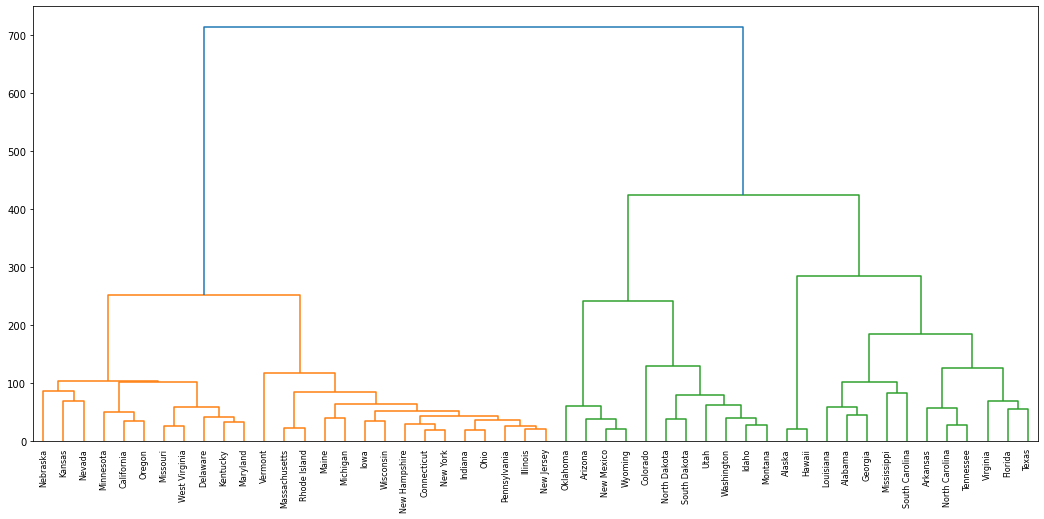

In [120]:
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(8)
plot_dendrogram(cl, ax=ax, labels=data['Unnamed: 0'].to_numpy())

***ЗАДАНИЕ 4***

Постройте дендрограмму для набора данных animals в пакете «cluster». Данные содержат 6 двоичных признаков для 20 животных. Переменные - [ , 1] war теплокровные; [ , 2] fly летающие; [ , 3] ver позвоночные; [ , 4] end вымирающие; [ , 5] gro живущие в группе; [ , 6] hai имеющие волосяной покров. Проинтерпретируйте полученный результат.


In [132]:
data = pd.read_csv('animals.csv')
data

,Unnamed: 0,war,fly,ver,end,gro,hai
0,ant,1,1,1,1.0,2.0,1
1,bee,1,2,1,1.0,2.0,2
2,cat,2,1,2,1.0,1.0,2
3,cpl,1,1,1,1.0,1.0,2
4,chi,2,1,2,2.0,2.0,2
5,cow,2,1,2,1.0,2.0,2
6,duc,2,2,2,1.0,2.0,1
7,eag,2,2,2,2.0,1.0,1
8,ele,2,1,2,2.0,2.0,1
9,fly,1,2,1,1.0,1.0,1


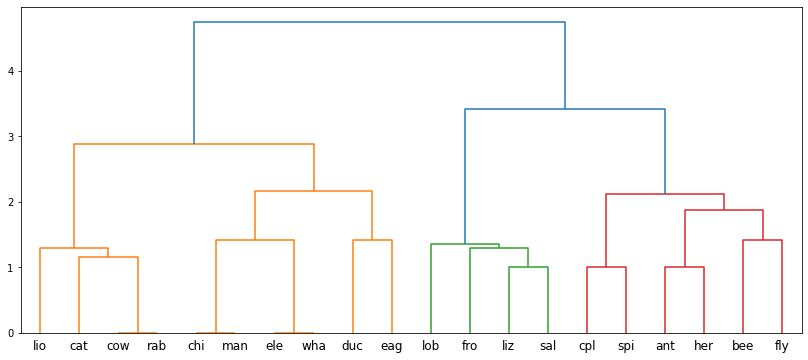

In [131]:
X = data.drop('Unnamed: 0', axis=1).fillna(0)
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cl.fit(X)
fig, ax = plt.subplots()
fig.set_figwidth(14)
fig.set_figheight(6)
plot_dendrogram(cl, ax=ax, labels=data['Unnamed: 0'].to_numpy())

***ЗАДАНИЕ 5***

Рассмотрите данные из файла seeds_dataset.txt, который содержит описание зерен трех сортов пшеницы: Kama, Rosa and Canadian. Признаки: 1. область A, 2. периметр P, 3. компактность C = 4*pi*A/P^2, 4. длина зерна, 5. ширина зерна, 6. коэффициент ассиметрии, 7. длина колоска.

*чего от меня хотят-то? что значит "рассмотрите"?..*

In [143]:
data = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

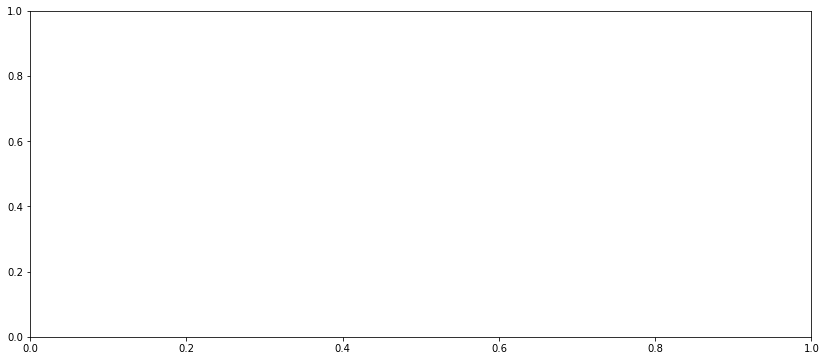

In [147]:
X = data
cl = AgglomerativeClustering(n_clusters=3)
cl.fit(X)
fig, ax = plt.subplots()
fig.set_figwidth(14)
fig.set_figheight(6)
plot_dendrogram(cl, ax=ax)